# Churn Analysis and Prediction Project

## Business Context

* What is the correlation between the features and the churn rate? What's the most correlated feature?
* Is there any patern on the churn customers?
* Is there a way to predict the churn rate with a +80% accuracy?

#### Importing Libraries

In [4]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.8 MB 4.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 4.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 4.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.5 MB/s  0:00:02

   ---------------------------------------- 0/2 [narwhals]
   -----------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'seaborn'

Instancing the objects

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

#### Dataset information

* Customer ID: Customer Identifier
* Gender: If the customer is a male or female
* SeniorCitizen: If the customer is a senior Citizen or not
* Partner: If the customer has a partner or not
* Dependents: If the customer has dependents or not
* Tenure: Number of months the customer stayed with the company
* PhoneService: If the customer has a phone service or not
* MultipleLines: If the customer has multiple lines or not
* InternetService: Customer's internet service provider 
* Online Security: If the customer has online security or not
* Online Backup: If the customer has online backup or not
* Device Protection: If the customer has device protection or not
* TechSupport: If the customer has tech support or not
* StreamingTV: If the customer has streaming TV or not
* StreamingMovies: If the customer has streaming movies or not
* Contract: The contract term of the customer
* PaperlessBilling: If the customer has paperless billing or not
* PaymentMethod: The customer's payment method
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: If the customer churned or not


#### Importing dataset

In [ ]:
master_path = "C:/Users/99837835/OneDrive - Anheuser-Busch InBev/My Documents/Particular/Projetos Portfolio/Churn Clients/"
df_telco = pd.read_csv(master_path + 'Telco-Customer-Analysis.csv', sep=",")

Initial analysis

In [ ]:
df_telco.shape

(7043, 21)

The dataset has 7032 rows and 21 columns. Let's deep dive on it on the next steps.

In [ ]:
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Comparing the data type and the information contained at the columns, we can realized that the columns SeniorCitizen and TotalCharges are not with the correct type. This two columns needs to be casted to the right type.

In [ ]:
df_telco['SeniorCitizen'] = df_telco['SeniorCitizen'].apply(str)

In [ ]:
df_telco['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [ ]:
# df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'])

In [ ]:
overview = pd.DataFrame ({
    "Types": df_telco.dtypes,
    "Nulls":df_telco.isnull().sum(),
    "% Nulls":df_telco.isnull().mean() * 100,
    "Unique Values": df_telco.nunique(),
    "Sample of values": df_telco.apply (lambda x: x.unique()[:3])
})
overview

,Types,Nulls,% Nulls,Unique Values,Sample of values
customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]"
gender,object,0,0.0,2,"[Female, Male]"
SeniorCitizen,object,0,0.0,2,"[0, 1]"
Partner,object,0,0.0,2,"[Yes, No]"
Dependents,object,0,0.0,2,"[No, Yes]"
tenure,int64,0,0.0,73,"[1, 34, 2]"
PhoneService,object,0,0.0,2,"[No, Yes]"
MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


Trying to cast the TotalCharges table to Numeric type, it returned an error. We realized that there is a blank string in one or some of the rows. So, to cast it, we need to analyse how many rows we have with this issue.

In [ ]:
num_spaces = (df_telco['TotalCharges'] == ' ').sum()
num_rows = df_telco.shape[0]
print(f'The blank strings of the column "TotalCharges" corresponds to {round(num_spaces/num_rows,5)}% of the total amount of rows of the dataframe')

The blank strings of the column "TotalCharges" corresponds to 0.00156% of the total amount of rows of the dataframe


As we saw, the impact of dropping these rows is minimal. So, we chose to drop it from our dataframe.

In [ ]:
df_telco = df_telco[df_telco['TotalCharges'] != ' ']

...And then we can cast the column

In [ ]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'])

In [ ]:
df_telco.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

What if we have nulls in our dataframe. Let's check it.

In [ ]:
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_telco['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [ ]:
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace('(','',regex=False)
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(')','',regex=False)
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace('automatic','',regex=False)

In [ ]:
df_telco['PaymentMethod'].value_counts()

PaymentMethod
Electronic check    2365
Mailed check        1604
Bank transfer       1542
Credit card         1521
Name: count, dtype: int64

Since we don't have any nulls in any column, we'll continue the analysis with the basic statistics for the columns.

In [ ]:
df_telco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,5890,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


Now, the next step we'll follow is map the categories among the categorical columns.

In [ ]:
categorical_columns = df_telco.columns.difference(['tenure','MonthlyCharges','TotalCharges','customerID'])

In [ ]:
df_categorical_columns = df_telco[categorical_columns]

In [ ]:
df_categorical_columns

,Churn,Contract,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender
0,No,Month-to-month,No,No,DSL,No phone service,Yes,No,Yes,Yes,Electronic check,No,0,No,No,No,Female
1,No,One year,No,Yes,DSL,No,No,Yes,No,No,Mailed check,Yes,0,No,No,No,Male
2,Yes,Month-to-month,No,No,DSL,No,Yes,Yes,Yes,No,Mailed check,Yes,0,No,No,No,Male
3,No,One year,No,Yes,DSL,No phone service,No,Yes,No,No,Bank transfer,No,0,No,No,Yes,Male
4,Yes,Month-to-month,No,No,Fiber optic,No,No,No,Yes,No,Electronic check,Yes,0,No,No,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,One year,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Mailed check,Yes,0,Yes,Yes,Yes,Male
7039,No,One year,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Credit card,Yes,0,Yes,Yes,No,Female
7040,No,Month-to-month,Yes,No,DSL,No phone service,No,Yes,Yes,Yes,Electronic check,No,0,No,No,No,Female
7041,Yes,Month-to-month,No,No,Fiber optic,Yes,No,No,Yes,Yes,Mailed check,Yes,1,No,No,No,Male


#### Frequency Analysis - Categorial columns

In [ ]:
df_categorical_columns

,Churn,Contract,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender
0,No,Month-to-month,No,No,DSL,No phone service,Yes,No,Yes,Yes,Electronic check,No,0,No,No,No,Female
1,No,One year,No,Yes,DSL,No,No,Yes,No,No,Mailed check,Yes,0,No,No,No,Male
2,Yes,Month-to-month,No,No,DSL,No,Yes,Yes,Yes,No,Mailed check,Yes,0,No,No,No,Male
3,No,One year,No,Yes,DSL,No phone service,No,Yes,No,No,Bank transfer,No,0,No,No,Yes,Male
4,Yes,Month-to-month,No,No,Fiber optic,No,No,No,Yes,No,Electronic check,Yes,0,No,No,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,One year,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Mailed check,Yes,0,Yes,Yes,Yes,Male
7039,No,One year,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Credit card,Yes,0,Yes,Yes,No,Female
7040,No,Month-to-month,Yes,No,DSL,No phone service,No,Yes,Yes,Yes,Electronic check,No,0,No,No,No,Female
7041,Yes,Month-to-month,No,No,Fiber optic,Yes,No,No,Yes,Yes,Mailed check,Yes,1,No,No,No,Male


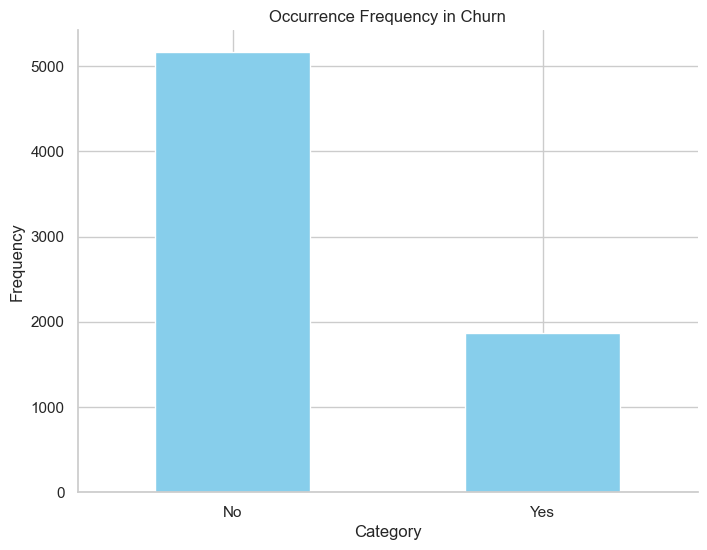

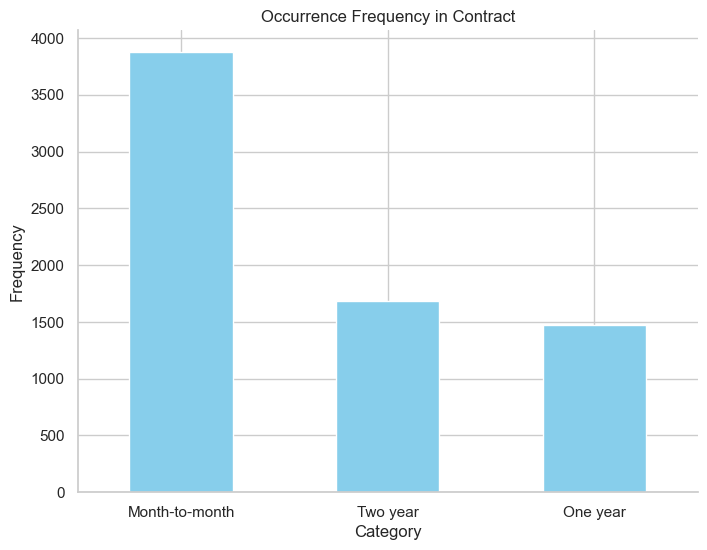

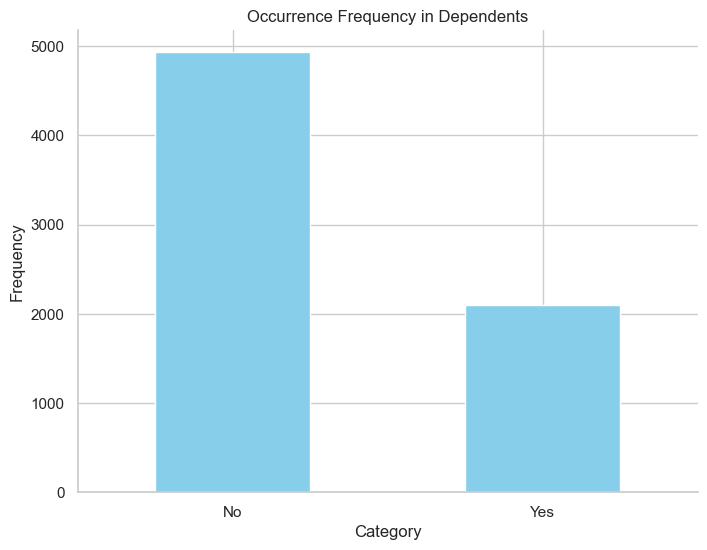

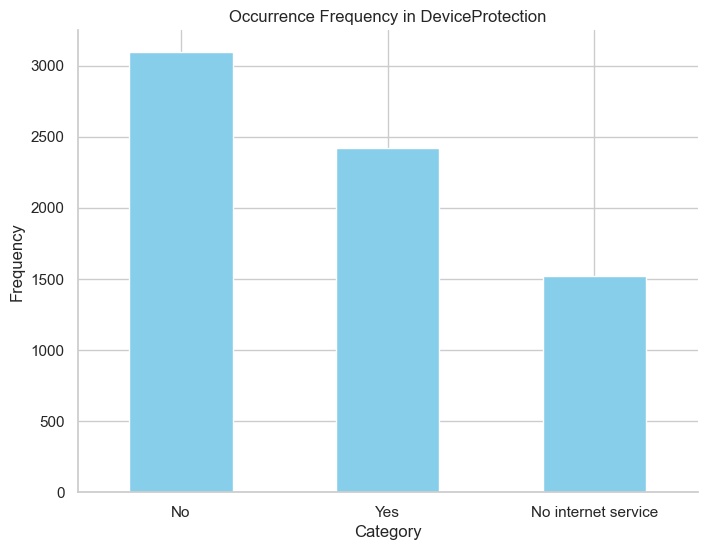

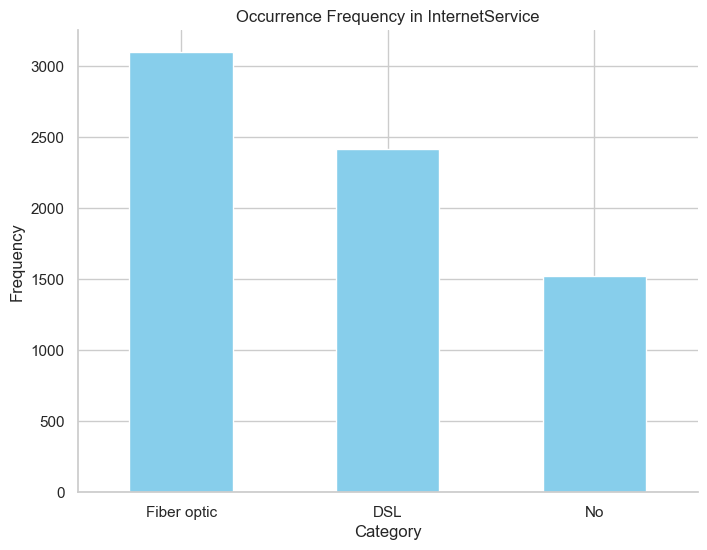

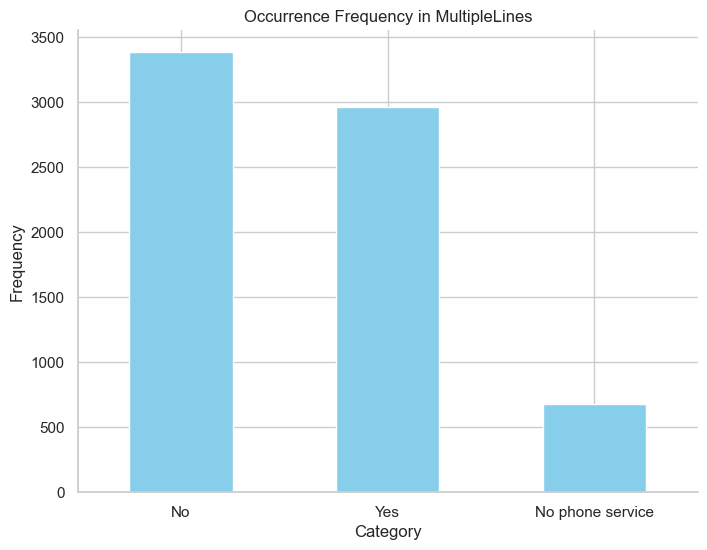

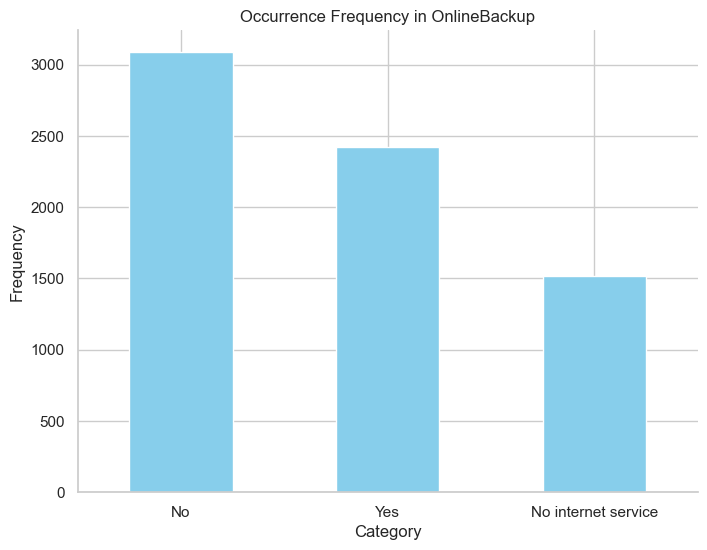

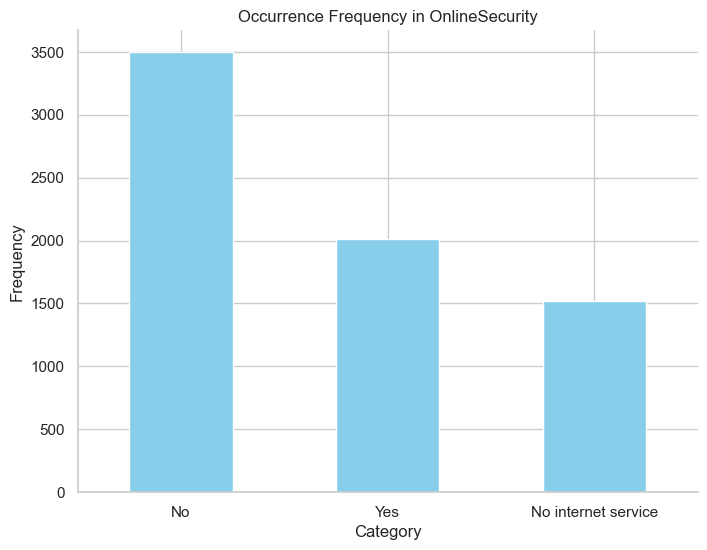

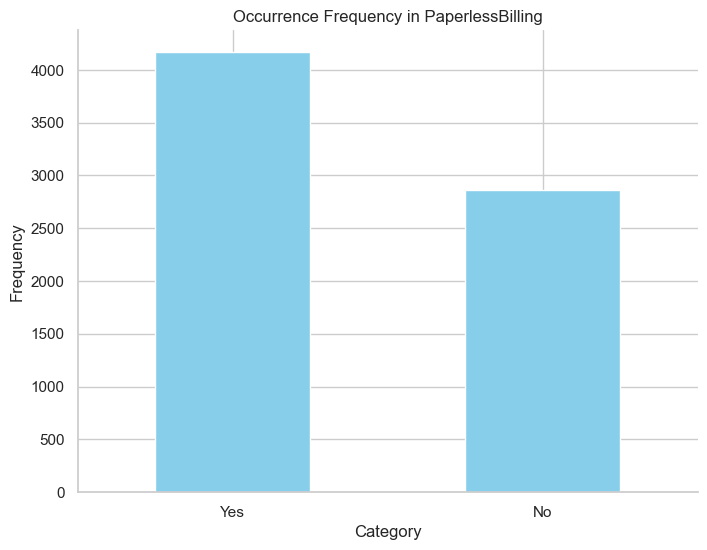

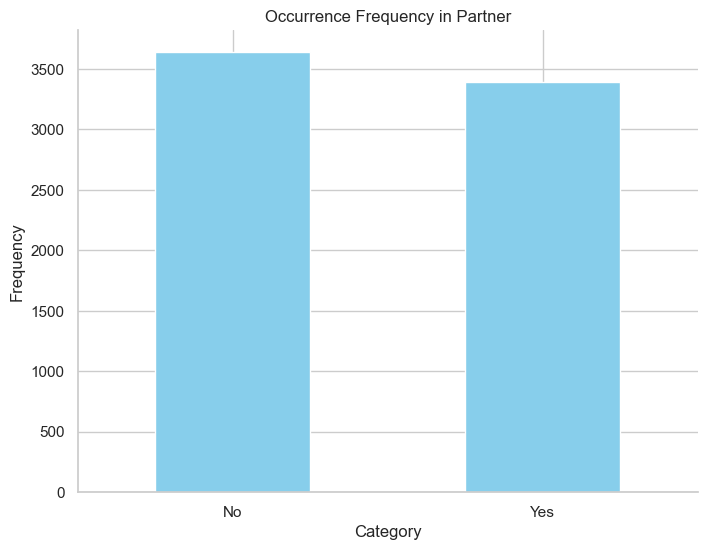

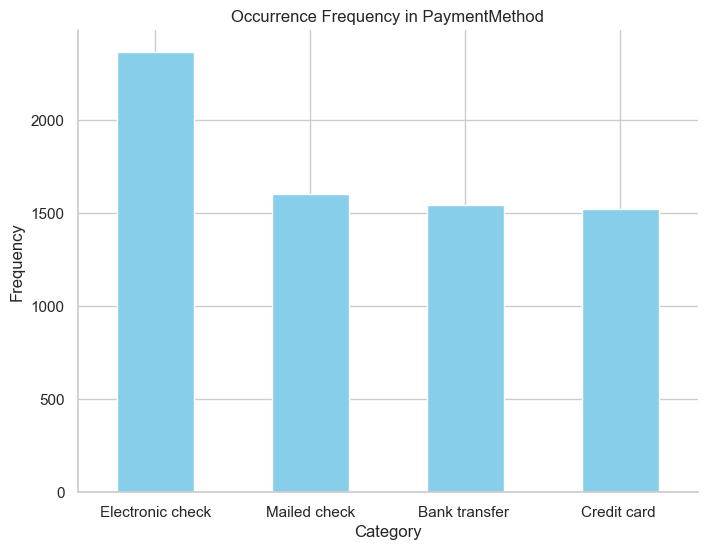

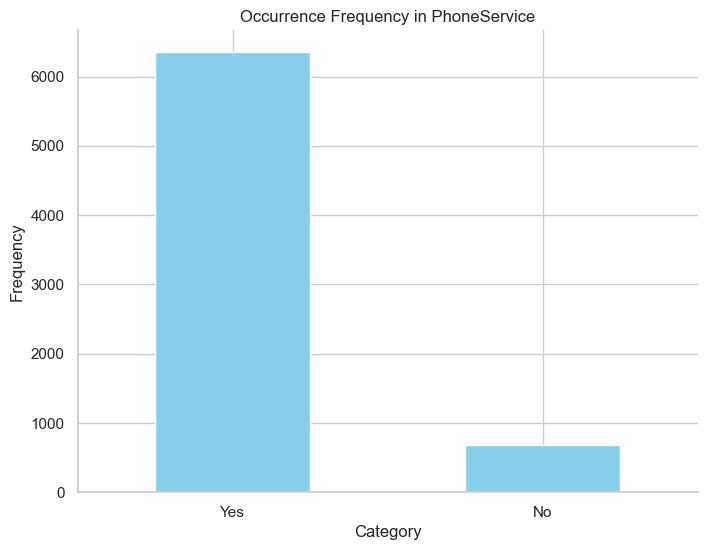

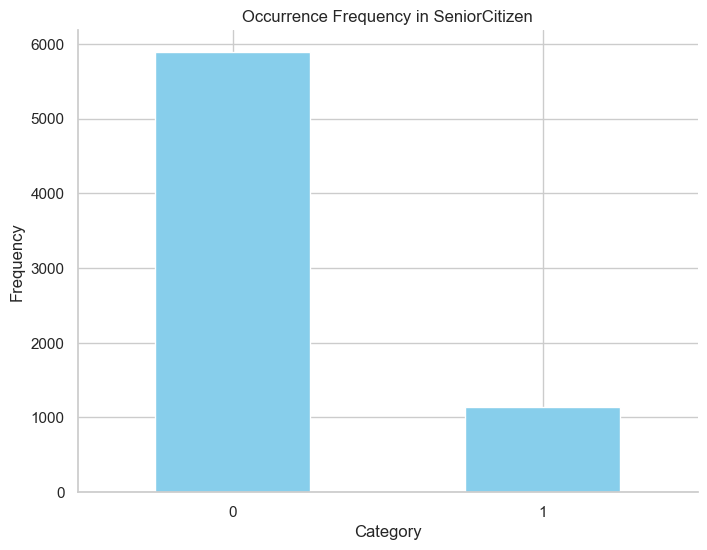

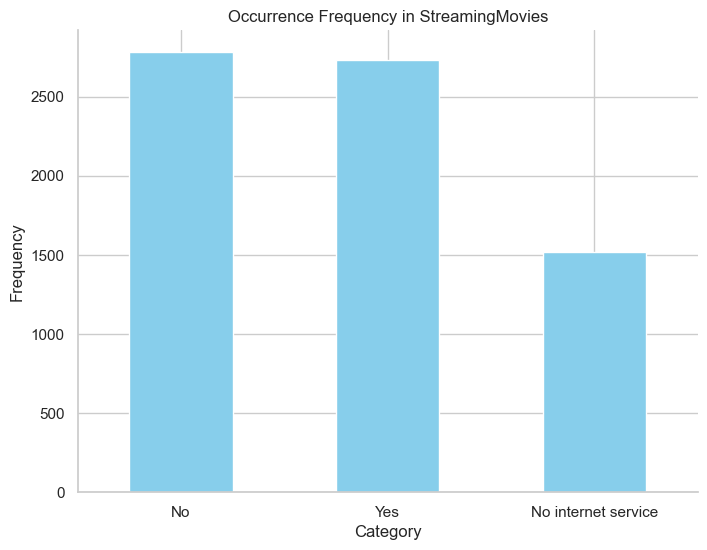

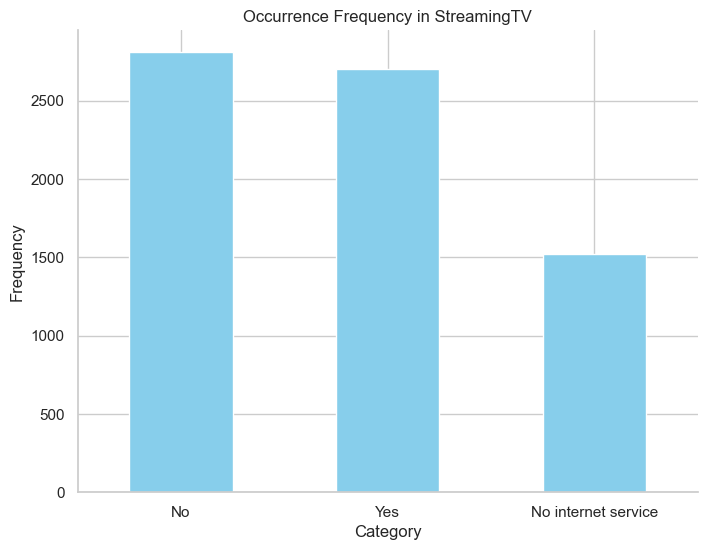

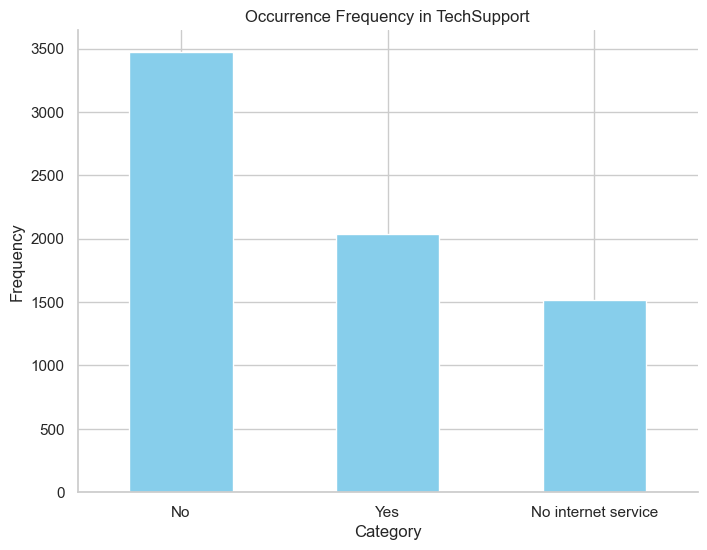

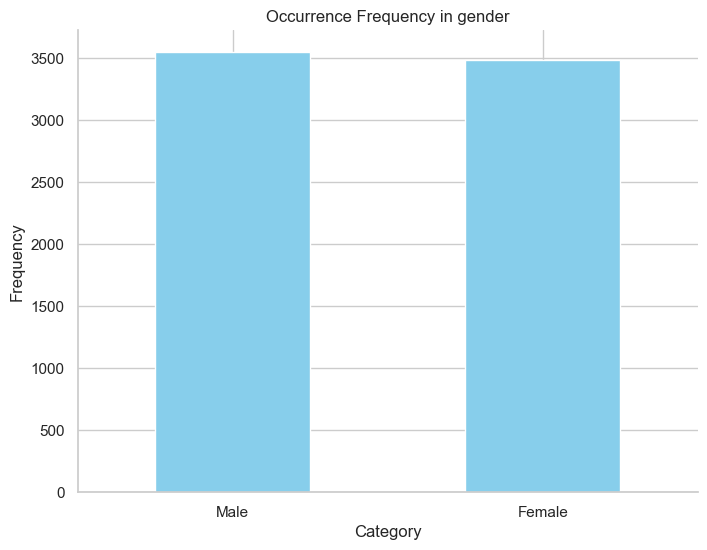

In [ ]:
sns.set(style="whitegrid")

for column in df_categorical_columns.columns:
    freq_category = df_categorical_columns[column].value_counts()

    ax = freq_category.plot(kind='bar', color='skyblue', figsize=(8,6))

    plt.title(f'Occurrence Frequency in {column}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

    sns.despine()
    plt.show()
    

Now let's do the same analysis to the numeric columns

In [ ]:
df_numeric_columns = df_telco[['MonthlyCharges','TotalCharges','tenure']]

In [ ]:
df_numeric_columns

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2
...,...,...,...
7038,84.80,1990.50,24
7039,103.20,7362.90,72
7040,29.60,346.45,11
7041,74.40,306.60,4


#### Frequency Analysis - Numeric columns

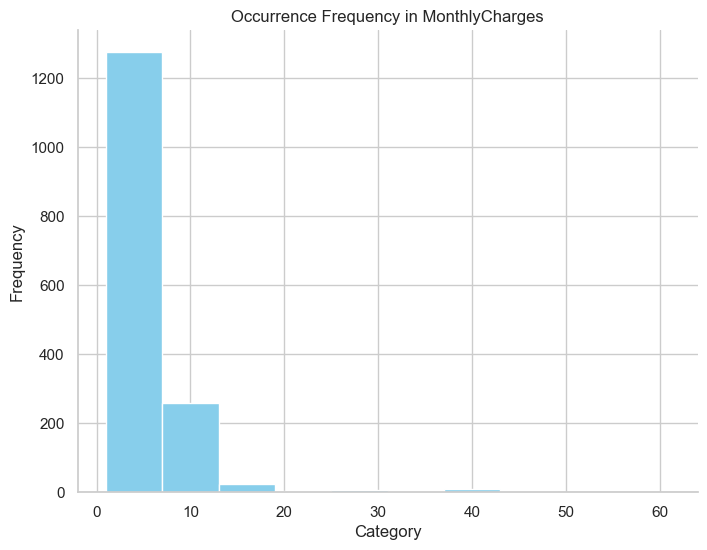

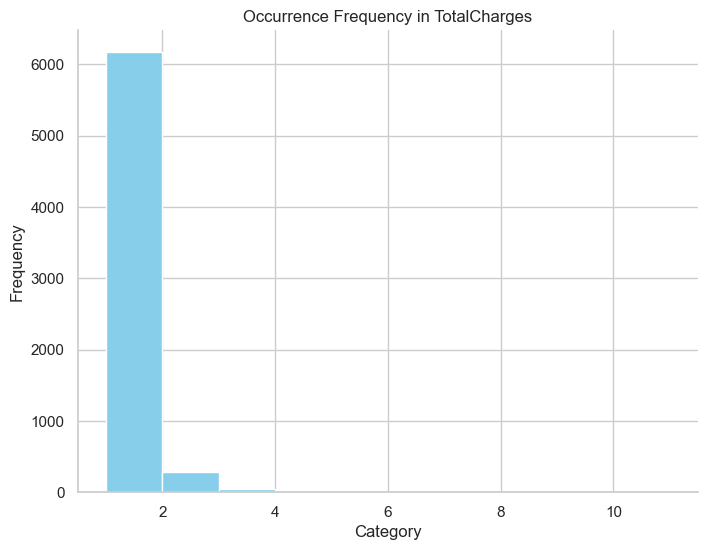

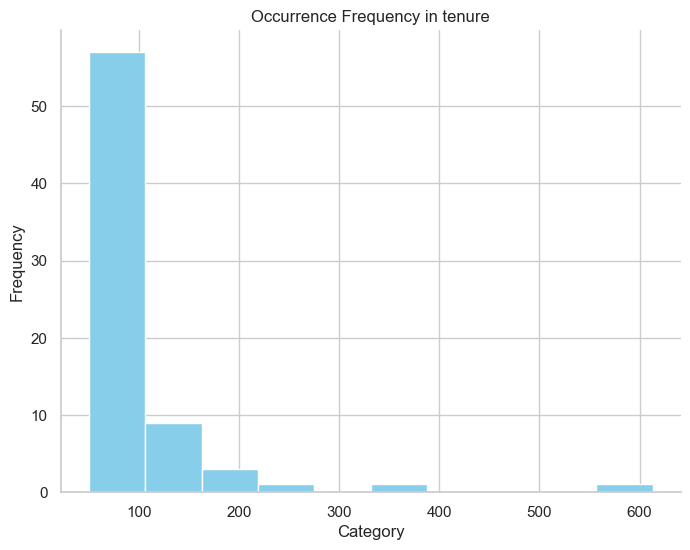

In [ ]:
sns.set(style="whitegrid")

for column in df_numeric_columns.columns:
    freq_numeric = df_numeric_columns[column].value_counts()

    ax = freq_numeric.plot(kind='hist', color='skyblue', figsize=(8,6))

    plt.title(f'Occurrence Frequency in {column}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

    sns.despine()
    plt.show()

#### Outliers identification

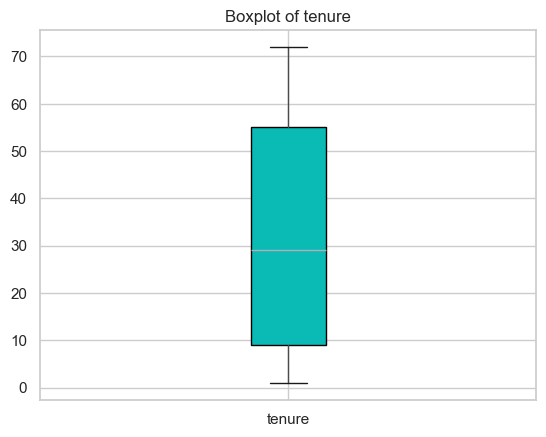

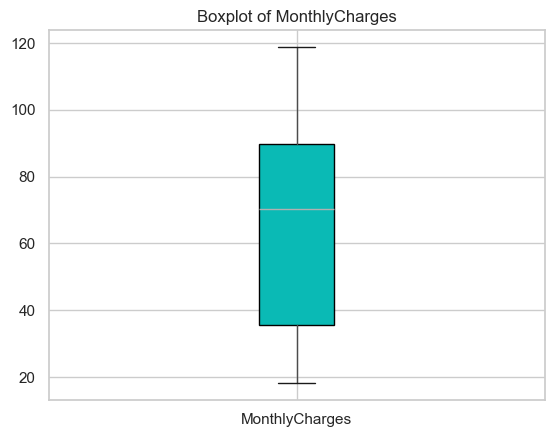

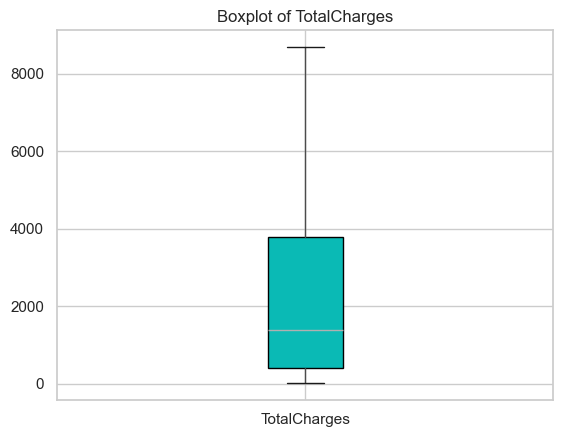

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um boxplot para cada coluna numérica
for column in df_telco.select_dtypes(include=[np.number]).columns:
    plt.figure()  # Cria uma nova figura
    df_telco.boxplot([column], patch_artist=True, boxprops=dict(facecolor='#0ABAB5'))  # Cria um boxplot para a coluna atual
    plt.title(f'Boxplot of {column}')  # Define o título do boxplot
    plt.show()  # Exibe o boxplot

As we could see, no outliers in our database.

#### Bivariate Analysis

We can realized a strong correlation between the features Tenure and Total Charges.

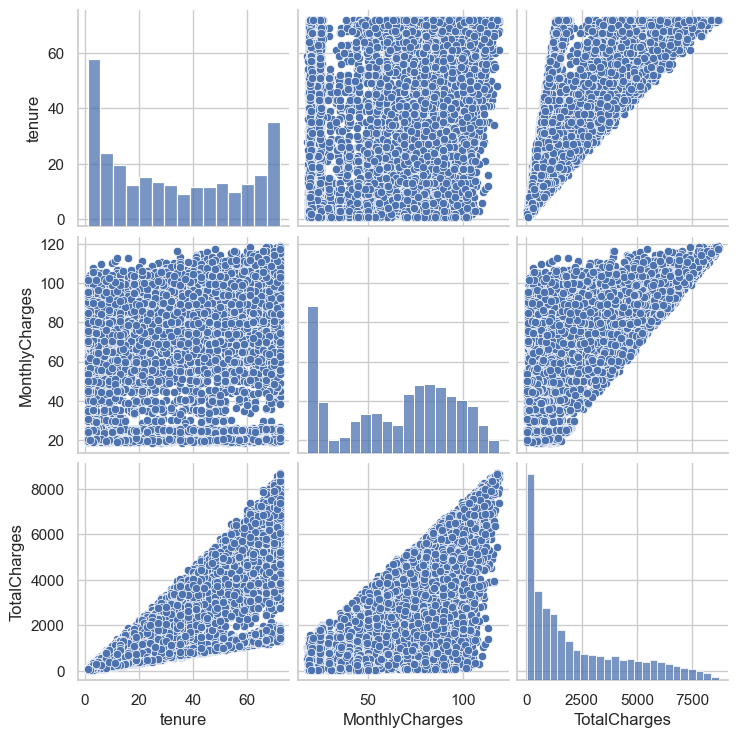

In [ ]:
ax = sns.pairplot(df_telco)

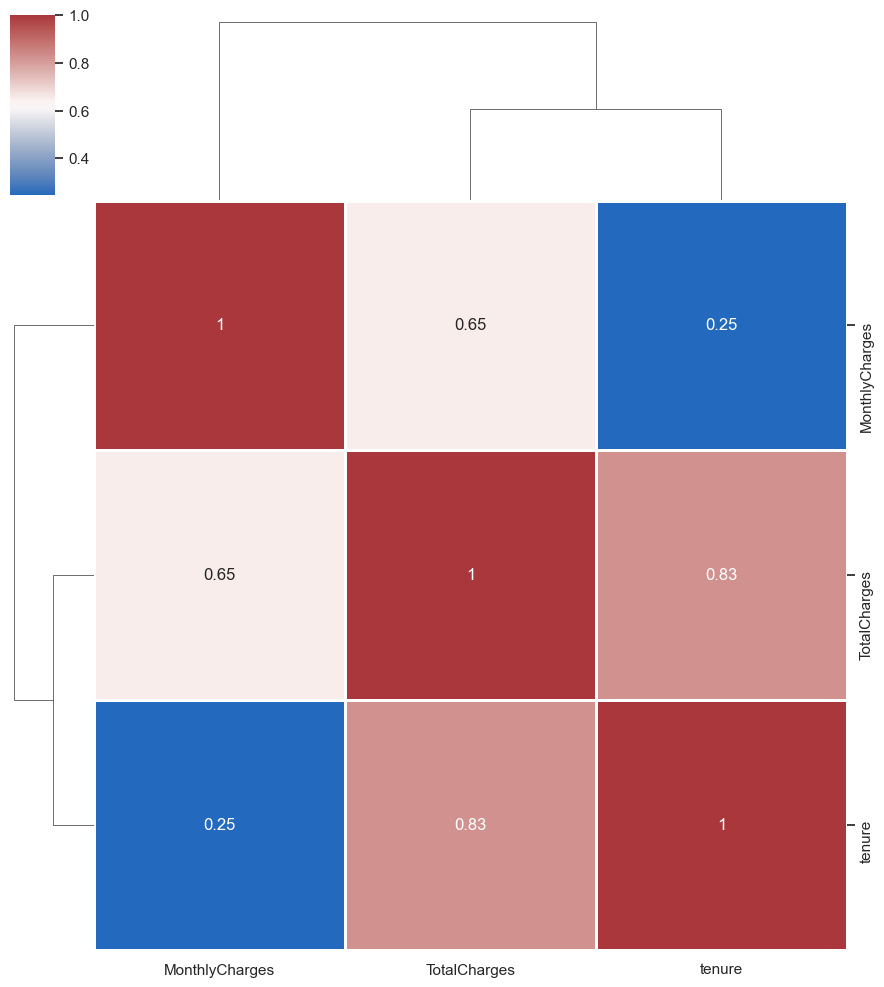

In [ ]:
sns.clustermap(df_numeric_columns.corr(), cmap = 'vlag', dendrogram_ratio= (0.1,0.2), annot = True, linewidths = 0.8, figsize = (9,10))

#### Data Preparation

To avoid overestimation of values and the quality of the ML Model, we chose to drop the duplicated values from our dataset. So let's check how many duplicated rows we have and drop them.

In [ ]:
print(f'There are {df_telco.duplicated().sum()} duplicated rows in the training dataset.')

There are 0 duplicated rows in the training dataset.


Fortunately, we haven't found any duplicated rows in our dataset.

In [ ]:
numeric_features = df_numeric_columns.columns.tolist()
numeric_features

['MonthlyCharges', 'TotalCharges', 'tenure']

In [ ]:
categorical_features = df_categorical_columns.columns.tolist()
categorical_features

['Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'gender']

#### Features encoding

For this project, we have many features with text values. Aiming to improve the accuracy of our model, we're going to use a label encoding as the first step to cast the atributes in a more suitable form. We'll apply it for all the String columns

In [ ]:

df_telco_2 = df_telco.copy()

df_telco_2[categorical_columns] = df_telco_2[categorical_columns].apply(le.fit_transform)

In [ ]:
df_telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Once our dataset received the first treatment layer, we'll start looking to our target feature: The Churn column. 
Taking a look in our frequency analysis above, we could realize that the data is very inbalanced for this feature. Because of it, we'd need to use a different approach

In [ ]:
pallete = ["#987284","#75b9be","#d0d6b5","#f9b5ac","#ee7674"]

In [ ]:
churn_ratio = list(df_telco_2['Churn'].value_counts())
churn_values = [churn_ratio[0]/sum(churn_ratio) * 100, churn_ratio[1]/ sum(churn_ratio) * 100]

Text(0.5, 1.0, 'Churn and Not-Churn Clients')

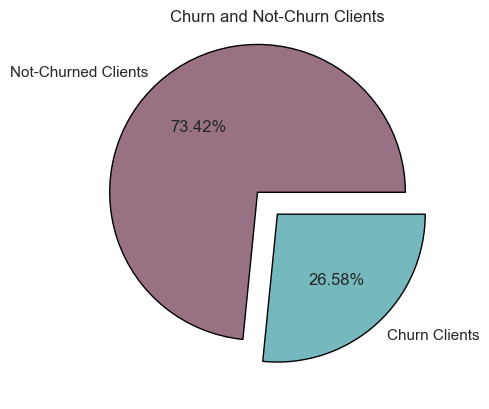

In [ ]:
plt.pie(churn_values, labels = ['Not-Churned Clients','Churn Clients'],
                      autopct = '%1.2f%%',
                      explode = (0.2,0),
                      colors = pallete,
                      wedgeprops = {'edgecolor': 'black', 'linewidth': 1, 'antialiased' :True})
plt.title('Churn and Not-Churn Clients')

In [ ]:
import numpy as np 
np.unique(df_telco_2['Churn'], return_counts = True)

(array([0, 1]), array([5163, 1869], dtype=int64))

Since we figured out that our data is desbalanced, we'll apply oversampling technique as first step before we apply any ML Model

In [ ]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

In [ ]:
smote = SMOTE(sampling_strategy='minority') 

In [ ]:
df_telco_x = df_telco_2.loc[ : , df_telco_2.columns != 'Churn']


In [ ]:
df_telco_x = df_telco_x.loc[ : , df_telco_x.columns != 'customerID']

In [ ]:
df_telco_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
df_telco_y = df_telco_2[['Churn']]

Splitting the dateset in train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_telco_x, df_telco_y, test_size=0.2, random_state=42)
print("X_train",x_train.shape)
print("X_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (5625, 19)
X_test (1407, 19)
y_train (5625, 1)
y_test (1407, 1)


Oversampling the datasets

In [ ]:
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)  

In [ ]:
x_train_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,43,0,1,0,0,0,2,0,2,2,0,1,0,49.050000,2076.200000
1,1,0,0,0,3,1,0,0,0,0,0,0,2,0,0,0,1,53.400000,188.700000
2,0,0,1,0,55,1,2,1,0,0,2,0,0,0,0,1,2,77.750000,4458.150000
3,1,0,1,1,45,1,0,0,2,0,0,2,0,0,2,0,0,54.650000,2553.700000
4,0,0,1,1,55,1,2,1,2,0,0,0,2,2,1,0,3,100.900000,5448.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,1,0,0,32,1,1,1,0,0,0,0,0,0,0,1,2,74.796563,2297.888528
8256,1,1,0,0,12,1,1,1,0,1,0,0,2,2,0,1,2,97.556414,1212.466277
8257,0,0,0,0,64,1,2,1,0,2,1,0,2,2,0,1,1,105.547345,6959.594710
8258,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.715360,79.715360


Applying Standard Scaler on the dataset

In [ ]:
scaler = StandardScaler()

In [ ]:

x_train_over_scaled = scaler.fit_transform(x_train_over)
x_test_over_scaled = scaler.transform(x_test)

In [ ]:
print(x_train_over_scaled.shape)
print(x_test_over_scaled.shape)

(8260, 19)
(1407, 19)


## Choosing the most suitable algorithm

* x_train_over_scaled
* y_train
* x_test_over_scaled
* y_test

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier as 
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [ ]:
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": xgb.XGBClassifier(max_depth = 6, learning_rate = 0.1, use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators = 1000)
}

In [ ]:
results = {}
for name, model in algorithms.items():
    cv_scores = cross_val_score(model, x_train_over_scaled, y_train_over, cv = 6)
    results[name] = {
        "mean_accuracy": np.mean(cv_scores),
        "std_accuracy" : np.std(cv_scores)
    }


c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

In [ ]:
for name, result in results.items():
    print(f"{name}:Average Accuracy:{result}")

Logistic Regression:Average Accuracy:{'mean_accuracy': 0.7985556069255151, 'std_accuracy': 0.03838823631661308}
Decision Tree:Average Accuracy:{'mean_accuracy': 0.7949276915043938, 'std_accuracy': 0.06675920074701824}
Random Forest:Average Accuracy:{'mean_accuracy': 0.8449303655570756, 'std_accuracy': 0.07183412224288054}
Gradient Boosting:Average Accuracy:{'mean_accuracy': 0.8218048237095584, 'std_accuracy': 0.06397333896668811}
SVM:Average Accuracy:{'mean_accuracy': 0.7995222241925769, 'std_accuracy': 0.02838809588604872}
KNN:Average Accuracy:{'mean_accuracy': 0.7909292790472492, 'std_accuracy': 0.05025699476438581}
XGBoost:Average Accuracy:{'mean_accuracy': 0.8374264811437063, 'std_accuracy': 0.08336584260532864}


Based on Cross Validation step, Random Forest and XGBoost were the algorithms that best fit with our data using the train dataset.

In [ ]:
#Hyperparameters definition
params_grid_rf = {
        'n_estimators': [100,200,300],
        'max_depth': [10,20,30,40, None],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4],
        'bootstrap':[True,False]
    }

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_grid_rf, cv=5, n_jobs=-1, verbose=True)
grid_search_rf.fit(x_train_over_scaled, y_train_over)

print(f'The best hyperparameters to Random Forest algorithm are:{grid_search_rf.best_params_}')
print(f'The best accuracy was:{grid_search_rf.best_score_:.4f}')

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The best hyperparameters to Random Forest algorithm are:{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The best accuracy was:0.8466


Now, let's apply the best parameters on the algorithm that we found in Grid Search

### Random Forest

In [ ]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
parameters = grid_search_rf.best_params_

In [ ]:
Churn_random_forest = RandomForestClassifier(**parameters) 
scaler = StandardScaler()

In [ ]:
Churn_random_forest

RandomForestClassifier(max_depth=20, n_estimators=200)

In [1]:
df_telco_2.columns

NameError: name 'df_telco_2' is not defined

In [67]:
Churn_random_forest_final_model = Churn_random_forest.fit(x_train_over_scaled, y_train_over)
Churn_random_forest_prediction = Churn_random_forest.predict(x_test_over_scaled)

c:\Users\99837835\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [73]:
x_train_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,43,0,1,0,0,0,2,0,2,2,0,1,0,49.050000,2076.200000
1,1,0,0,0,3,1,0,0,0,0,0,0,2,0,0,0,1,53.400000,188.700000
2,0,0,1,0,55,1,2,1,0,0,2,0,0,0,0,1,2,77.750000,4458.150000
3,1,0,1,1,45,1,0,0,2,0,0,2,0,0,2,0,0,54.650000,2553.700000
4,0,0,1,1,55,1,2,1,2,0,0,0,2,2,1,0,3,100.900000,5448.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,1,0,0,32,1,1,1,0,0,0,0,0,0,0,1,2,74.796563,2297.888528
8256,1,1,0,0,12,1,1,1,0,1,0,0,2,2,0,1,2,97.556414,1212.466277
8257,0,0,0,0,64,1,2,1,0,2,1,0,2,2,0,1,1,105.547345,6959.594710
8258,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.715360,79.715360


In [72]:
import joblib

filename = 'Churn_random_forest_final.pkl'
joblib.dump({'model':Churn_random_forest_final_model, 'scaler':scaler}, 'final_churn_prediction.pkl')

['final_churn_prediction.pkl']

In [76]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Suponha que estas sejam as colunas categóricas
categorical_columns = df_categorical_columns

# Criar e treinar o LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    le.fit(df_telco[column])  # Ajuste o encoder nos dados de treinamento
    label_encoders[column] = le

# Salvar os encoders
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']